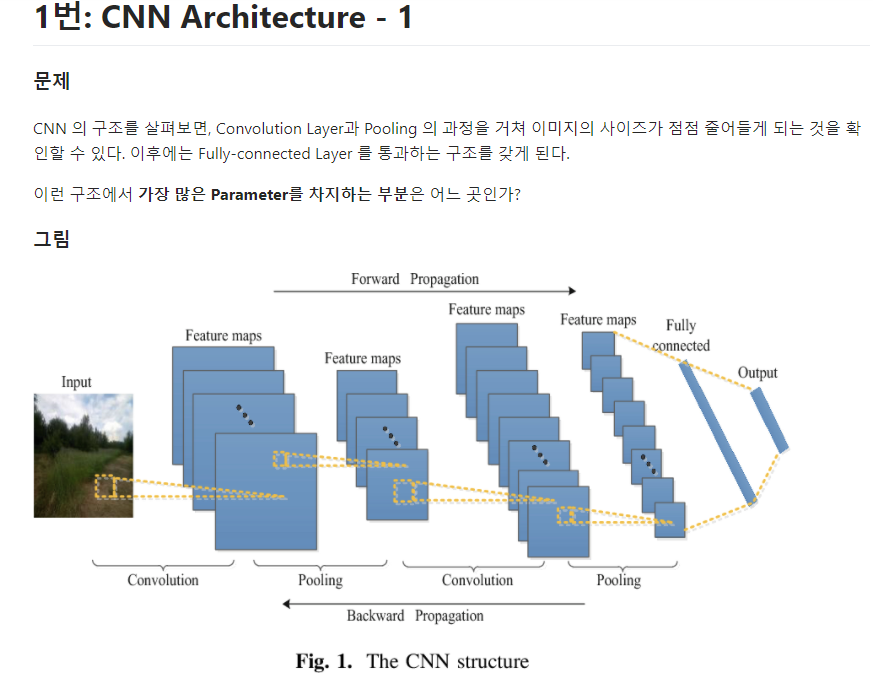

In [ ]:
Fully Connected Layer
컨볼루션 레이어의 학습 파라미터 수는 입력태널수X필터폭X필터높이X출력채널수

마지막 Feature maps와 output의 fully-connected 파트
FC(Fully Connected)가 가장 많은 파라미터를 갖게 됩니다.
CNN에서 파라미터를 갖는 부분은 Filter부분인데 FC에 비하면 현저히 작은 파라미터를 갖습니다.
마지막 layer에서 feature map을 flatten해서 FC layer에 넣어줄 때 parameter가 가장 많이 발생한다.



# 2번: CNN Architecture - 2

CNN 의 구조를 살펴보면, Convolution Layer과 Pooling 의 과정을 거쳐 이미지의 사이즈가 점점 줄어들게 되는 것을 확인할 수 있다. 이후에는 Fully-connected Layer 를 통과하는 구조를 갖게 된다.

Parameter를 많이 차지하는 부분을 대체하기 위한 방법으로 제안된 기법은 어느 것인가?

In [ ]:
fc-layer를 Conv-layer로 대체하는 방법

Fully Convolution Network
여러 계층의 작은 Filter들의 학습을 통해 전체를 연결하는 FC보다 작은 파라미터로 학습할 수 있습니다.
FC layer을 대체하는 기법은 하나가 아니라 여러개가 있다. 대표적으로는 GAP(Global Average Pooling)을 사용하여 하나의 feature map에 대해 하나의 스칼라값을 생성해내는 방법도 있을 것이고 GoogleNet에서 제안되었던 bottleneck (1x1 convolution filter)을 사용하여 FC layer 자체를 Convolution layer로 대체할 수도 있겠다.

# 3번: CNN Architecture - 3
CNN 의 구조를 살펴보면, Convolution Layer과 Pooling 의 과정을 거쳐 이미지의 사이즈가 점점 줄어들게 되는 것을 확인할 수 있다. 이후에는 Fully-connected Layer 를 통과하는 구조를 갖게 된다.

CNN에서 특정 레이어들을 통해 Feature Extraction이 진행된다. Feature Extractor의 역할로 이미지의 차원을 줄이는 부분은 무엇인가?

In [ ]:
Pooling Layer

Feature extraction은 이미지의 특징을 추출하는 역할
Feature extraction에서 사용하는 대표적인 계층들은 Convolution layer + ReLu 와 Pooling
Convolution layer 란 입력 특성 맵의 타일을 추출한 다음, 이 타일에 필터를 적용하여 새로운 특성을 산출
Pooling은 처리 시간을 줄이기 위해 Convolution 된 특성을 다운샘플링하는것 가장 중요한 특성 정보만 남겨 특성 맵의 차원 수를 줄이는 것

차원이 줄어드는 layer은 Pooling layer이다. Pooling을 통해 feature map의 차원을 줄여주게 되고 그 과정이 가지는 의미는 input에 대한 작은 translation이 일어났을 때 output이 invariant하게 한다는 것이다. 즉 pooling layer가 가지는 의미는 차원축소의 효과도 있지만, input에 대한 작은 변화가 발생해도 output은 크게 변하지 않거나 동일한 feature을 내포하게 된다는 것이다.



# 4번: Convolution's Attribute

CNN 에서는 Convolution Layer 를 사용하여, 이미지 정보를 샘플링 하게 됩니다.

Convolution 연산은 translation 에 equivariance 하지만, 실제 CNN 에서는 translation 에 invariance 하게 됩니다.

이 문장에 대하여 이해한 뒤, 이러한 현상이 발생하는 원인에 대하여 서술하시오.

In [ ]:
convolution + 파라미터 공유를 하면 equivariance를 통해 반대 특성인 translation invariance 특성 또한 갖게 되기 때문에

invariance : 불변성
translation invariance는 입력의 위치가 변해도 출력은 변하지 않는다는 의미
max-pooing은 대표적인 small translation invariance 함수이다. 여러 픽셀 중 최대값을 가진 픽셀 하나를 출력하기 때문

In [ ]:
- translation invariance(불변성)는 입력 데이터에서 어떤 객체의 위치가 달라져도 출력이 똑같은 값을 갖는 것을 말한다.

- Convolution 연산에서 translation에 equivariance하다는 것은 당연하다. 객체의 위치가 달라지면 특정 filter(feature)에 대한 연산의 결과가 달라지기 때문이다.

CNN에선 CNN의 특징과 함께 Max Pooling, label에 대한 확률 계산을 통해 translation invariance함을 만족시킬 수 있다.
- Max Pooling으로 특정 영역 안의 값을 하나로 추출할 수 있다. 조금 이동한 객체는 Max Pooling을 통해서 같은 값으로 추출될 수 있다.
- CNN의 Filter는 Convolution연산을 통해 동일한 Weight을 공유하며, global이 아닌 local feature들과 연산하게 되므로써 부분지역에 대한 local feature를 학습하므로, 각 Filter는 객체의 위치에 상관 없는 특정 패턴을 학습한다. 예를 들어 사람 얼굴을 추출하는 학습을 할 때, 특정 filter는 눈 모양을 잘 얻도록 학습될 것이다.
- Conv layer를 하나의 큰 label별 확률 추출기라고 생각할 수 있다. FC를 거치기 전 Conv layer의 최종 출력에 대해 특정 label을 잘 매칭시킬 수 있는 노드와 대응하며 학습하게 된다. 따라서 특정 label이 나오기 위해서 특정 채널과 원본 입력이 비슷한 패턴을 가져야 한다.
따라서 CNN에선 객체의 위치와 상관없이 패턴을 학습하기 때문에 translation invariance한 성질을 가진다.

translation invariance 는 input의 위치가 달라져도 output이 동일하다는거다. Convolution layer 에서 convolution filter로 연산을 할 때 feature의 위치가 바뀌기 때문에 당연하게도 Convolution 연산은 translation에 equivariance 하다. 하지만 max pooling을 하면서 pooling하는 지역중 가장 큰 값이 어디에 있는지는 중유하지 않으므로 약간의 translation 에 invariance를 얻게 되고 Softmax를 통해 전체 중 가장 큰 값만 남게 되므로 translation 에 invariance 하게 된다.


# 5번: CNN Component


아래 베이스라인은 CNN 의 각 구성요소를 나타냅니다.

각 구성요소가 담당하는 기능에 대하여 설명하고, 분류(Classification) 문제를 학습하려고 할 때, 어떤 순서로 배치해야할지 순서를 나열해주세요.

베이스라인
*   1) Global Average Pooling
* 2) Convolution Layer
* 3) Fully Connected Layer
* 4) Batch Normalization
* 5) Pooling (Max or Average)
* 6) Dropout



CNN - Convoltuion, 즉 합성곱을 이용하여 이미지 처리에 필요한 가중치의 수를 줄임으로써 연산량의 감소와 효과적인 이미지 처리를 목표로 하는 모델

Convolution Layer 
* 입력 데이터에 필터를 적용 후 활성화 함수를 반영하는 필수 요소
* 입력된 이미지에서 테두리,선,색 등 이미지의 시각적인 특징이나 특성을 감지하기 위해서

Batch Normalization
* 배치 정규화는 평균과 분산을 조정하는 과정이 별도의 과정으로 떼어진 것이 아니라, 신경망 안에 포함되어 학습 시 평균과 분산을 조정하는 과정

Dropout
* 간단하지만 아주 강력한 정규화(regularization) 방법

Pooling (Max or Average) 
* 컨볼류션 레이어의 출력 데이터를 입력으로 받아서 출력 데이터(Activation Map)의 크기를 줄이거나 특정 데이터를 강조하는 용도로 사용 
* 해당 범위의 값들 중에서 하나를 선택해서 가져오는 역할 

Fully Connected Layer
* 기존의 신경망에서 각 층별 연결에 사용되는 방식으로 전결합층
* 발견한 특징점을 기반으로 이미지를 분류하는데 활용

Global Average Pooling
* Max(Average) Pooling 보다 더 급격하게 feature의 수를 줄임
* feature를 1차원 벡터로 만들기 위함

In [ ]:
Convolution Layer
Batch Normalization
Pooling (Max or Average)

Global Average Pooling
Dropout
Fully Connected Layer

Conv - (Batch norm) - Activation - (Dropout) - Pooling - FC layer - GAP

In [ ]:
1) Global Average Pooling : feature 수를 급격하게 줄여 1차원 벡터로 만드는 것이 목적이다. 이는 파라미터를 많이 갖게되는 FC layer를 대체하기 위해 도입되었다.
2) Convolution Layer : input data에 컨볼루션 연산을 하여 특징을 추출한다.
3) Fully Connected Layer : 이전 레이어의 모든 노드들과 완전히 연결하여 1차원 벡터를 생성한다. 주로 output 출력 단계 직전에 사용하는 레이어. fc layer를 사용하면 파라미터 수가 많아진다.
4) Batch Normalization : mini batch 단위로 정규화, 스케일링, 쉬프팅을 하여 더 빠르고 안정적으로 학습할 수 있게 하는 역할.
5) Pooling (Max or Average) : 많은 필터를 거쳐 쌓인 feature map의 차원을 줄여 오버피팅을 막고 파라미터를 줄이도록 하는 역할
6) Dropout : 모델 학습의 오버피팅을 막기위해 한 레이어의 일정 노드를 drop함.

Conv -> BN -> activation -> dropout -> pooling -> ... -> fc 또는 gap
